In [28]:
import numpy as np 
import pandas as pd
import seaborn as sns 
from matplotlib import pyplot as plt
import math
from tqdm import tqdm 

In [29]:
def function(x):
    return x**3+x-0.5

Bisection: 100%|██████████| 50/50 [00:00<00:00, 1112.90iter/s, a=0.424, b=0.423, mean=0.423, f(a)=0.000242, f(b)=-0.000943, converge=-0.000943]


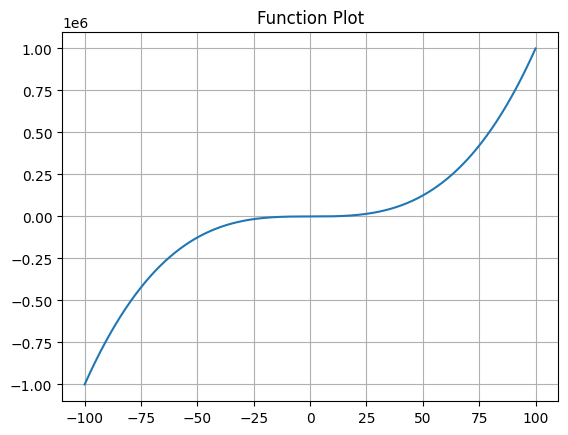

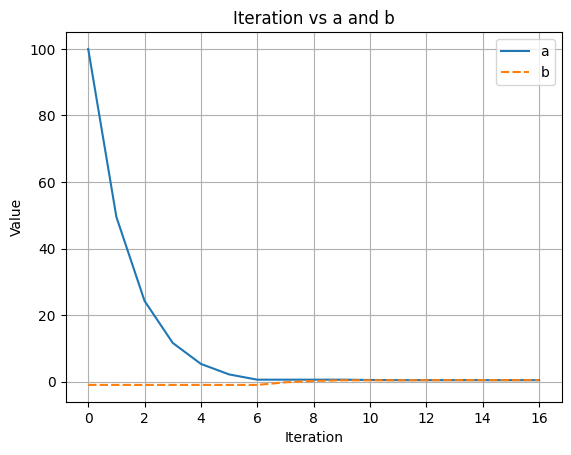

(0.4224700927734375,
 a           0.424011
 b           0.422470
 mean        0.422470
 f(a)        0.000242
 f(b)       -0.002127
 converge   -0.002127
 Name: 16, dtype: float64,
              a         b       mean          f(a)      f(b)       converge
 0   100.000000 -1.000000  49.500000  1.000100e+06 -2.500000  121336.375000
 1    49.500000 -1.000000  49.500000  1.213364e+05 -2.500000  121336.375000
 2    24.250000 -1.000000  24.250000  1.428427e+04 -2.500000   14284.265625
 3    11.625000 -1.000000  11.625000  1.582135e+03 -2.500000    1582.134766
 4     5.312500 -1.000000   5.312500  1.547454e+02 -2.500000     154.745361
 5     2.156250 -1.000000   2.156250  1.168155e+01 -2.500000      11.681549
 6     0.578125 -1.000000   0.578125  2.713509e-01 -2.500000       0.271351
 7     0.578125 -0.210938  -0.210938  2.713509e-01 -0.720323      -0.720323
 8     0.578125  0.183594   0.183594  2.713509e-01 -0.310218      -0.310218
 9     0.578125  0.380859   0.380859  2.713509e-01 -0.063896

In [ ]:
def bisection_method(max_iter=50, a=None,b=None,function=None, tol=0, function_plot=False, analysis_range=None, dataframe=False, graph=False, final_row=False, result=True, verbose=True):


    if function is None:
        raise ValueError("A function must be provided.")

    if a is None or b is None:
        raise ValueError("Both interval endpoints a and b must be provided.")

    if function(a) * function(b) > 0:
        raise ValueError("Function has same signs at a and b. Choose a different interval.")

    if analysis_range is not None and not function_plot:
        raise ValueError("Cannot perform analysis range without function_plot=True.")

    if analysis_range is None:
        analysis_range = [-100, 100]

    array_list = [np.array([a,b,(a+b)/2,function(a),function(b),function((a+b)/2)])]
    for i in range(max_iter):

        mean = (array_list[-1][0] + array_list[-1][1]) / 2
        f_mean = function(mean)
        f_a = function(array_list[-1][0])

        if f_mean == 0:
            a = mean
            b = mean
        elif f_a * f_mean < 0:
            a = array_list[-1][0]
            b = mean
        else:  
            a = mean
            b = array_list[-1][1]

        if abs(a - b) < tol:
            break

        array_list.append(np.array([a,b,mean,function(a),function(b),f_mean]))

    if verbose:
        iterator = tqdm(range(max_iter), desc="Bisection", unit="iter", dynamic_ncols=True)
        for i in iterator:
            iterator.set_postfix({"a": a, "b": b, "mean": mean, "f(a)": function(a), "f(b)": function(b), "converge": f_mean})

    
    df = pd.DataFrame(array_list, columns=(['a','b','mean','f(a)','f(b)','converge']))

    results = []


    if result:
        results.append(df.iloc[-1,2])

    if function_plot:
        x = np.arange(analysis_range[0],analysis_range[1],0.001)
        y = function(x)
        sns.lineplot(x=x, y=y)
        plt.title('Function Plot')
        plt.grid(True)
        plt.show()

    if final_row:
        results.append(df.iloc[-1,:])

    if dataframe:
        results.append(df)

    if graph:
        sns.lineplot(data=df[['a', 'b']])
        plt.xlabel('Iteration')
        plt.ylabel('Value')
        plt.title('Iteration vs a and b')
        plt.grid(True)
        plt.show()

    if not results:
        return df.iloc[-1,:]

    if len(results) == 1:
        return results[0]
    else:
        return tuple(results)

bisection_method(50,100,-1,function, graph=True, dataframe=True, function_plot=True, final_row=True, tol=0.001)